# This Code About Convolotional Neural Network
<p>Test for git and github</p>

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
# بارگیری مجموعه داده MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# نرمال‌سازی داده‌ها
x_train, x_test = x_train / 255.0, x_test / 255.0

# اضافه کردن بُعد کانال برای سازگاری با ورودی CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# تعریف مدل CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [6]:
# کامپایل مدل
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
# آموزش مدل
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5


1875/1875 [==============================] - 14s 7ms/step - loss: 0.1452 - accuracy: 0.9548 - val_loss: 0.0503 - val_accuracy: 0.9843
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0320 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0390 - val_accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0336 - val_accuracy: 0.9898


313/313 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9898
Test Accuracy: 0.989799976348877


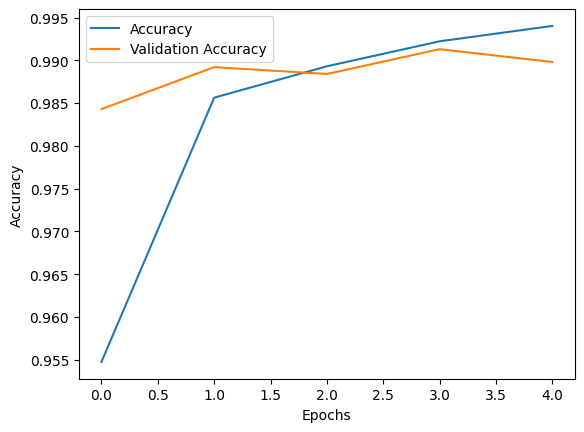

In [9]:
# ارزیابی مدل
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# نمایش نمودار دقت و خطا در طی آموزش
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
